In [119]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Loading the data

In [120]:
boston = load_boston()

In [121]:
x=boston.data
y=boston.target
y.shape
con=np.ones((506,1))
x=np.hstack((con,x))
x.shape

(506, 14)

## Visualization of data

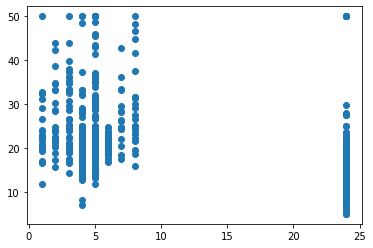

In [122]:
plt.scatter(x[:,9],y)

## Splitting and feature scaling

In [131]:
mean = np.mean(x)
std = np.std(x)
x = (x - mean)/std 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3)


In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 14)
(152, 14)
(354,)
(152,)


## Model

In [133]:
def model(x,y,learning_rate,iteration):
    m=y.size
    theta=np.zeros(14,)
    cost_list = []
    for i in range(iteration):
        y_=np.dot(x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_ - y))
        gradient = (1/m)*np.dot(x.T,y_- y)
        theta=theta-learning_rate*gradient
        cost_list.append(cost)
        if(i%(iteration/10)==0):
            print("cost", cost)
        
    return theta,cost_list

In [164]:
learning_rate = 0.0001
iteration = 100000

In [165]:
theta,cost_list = model(x_train,y_train,learning_rate = learning_rate,iteration = iteration)
theta.shape


cost 302.06714689265533
cost 41.970898141061355
cost 38.17220214223513
cost 36.917271067514186
cost 36.000301366192915
cost 35.20524429303147
cost 34.50119674299559
cost 33.87568399904846
cost 33.31910949979605
cost 32.82317472139151


(14,)

## Testing the model

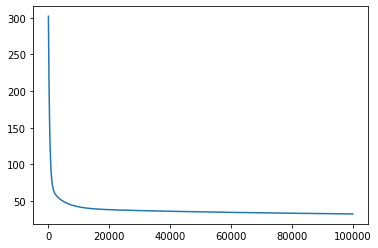

In [166]:
rng = np.arange(0,iteration)
plt.plot(rng,cost_list)
plt.show()


In [199]:
m = x_test.size
prediction = np.dot(x_test,theta)
error= (1/m)*np.sum(np.absolute(y_test-prediction))

In [200]:
print("Test error is :",error)

Test error is : 0.4113067728827367
